[코드 8-1] 결측치가 있는 데이터프레임

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
'B': [6, 7, 8, np.nan, 10],
'C': [11, 12, 13, np.nan, np.nan]})
df

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,NaN,8.0,13.0
3,4.0,NaN,NaN
4,5.0,10.0,NaN


[코드 8-2] 결측치 위치 확인

In [ ]:
pd.isna(df)

,A,B,C
0,False,False,False
1,False,False,False
2,True,False,False
3,False,True,True
4,False,False,True


[코드 8-3] 열별 결측치 개수 확인

In [ ]:
pd.isna(df).sum( )

A    1
B    1
C    2
dtype: int64

[코드 8-4] 행별로 모든 결측치 제거

In [ ]:
df_drop_nan = df.dropna( )
df_drop_nan

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0


[코드 8-6] 숫자로 결측치 대체

In [ ]:
df_0 = df['C'].fillna(0)
print(df_0)

0    11.0
1    12.0
2    13.0
3     0.0
4     0.0
Name: C, dtype: float64


[코드 8-7] 문자로 결측치 대체

In [ ]:
df_missing = df['A'].fillna('missing')
df_missing

0        1.0
1        2.0
2    missing
3        4.0
4        5.0
Name: A, dtype: object

[코드 8-8] 평균으로 결측치 대체

In [ ]:
# df.fillna(df.mean( ), inplace=True)
df_mean = df.fillna(df.mean( ))
print(df, '\n')
print(df_mean)

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A      B     C
0  1.0   6.00  11.0
1  2.0   7.00  12.0
2  3.0   8.00  13.0
3  4.0   7.75  12.0
4  5.0  10.00  12.0


[코드 8-9] 주변 데이터로 결측치 대체

In [ ]:
print(df, '\n')

#결측치 바로 위의 값으로 대체하기
df_ffill = df.fillna(method='ffill')
print(df_ffill, '\n')

#결측치 바로 아래의 값으로 대체하기
df_bfill = df.fillna(method='bfill')
print(df_bfill)

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  2.0   8.0  13.0
3  4.0   8.0  13.0
4  5.0  10.0  13.0 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  4.0   8.0  13.0
3  4.0  10.0   NaN
4  5.0  10.0   NaN


[코드 8-10] 각 열을 서로 다른 값으로 대체

In [ ]:
fill_dict = {'A': df['A'].mean( ), 'B': '12/25', 'C': 'missing'}
df_filled = df.fillna(value=fill_dict)
df_filled

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,12/25,missing
4,5.0,10.0,missing


[코드 8-11] 라이브러리

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, date, time
warnings.filterwarnings('ignore')

In [2]:
#Google Drive Mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


[코드 8-12] 파일명 확인

In [4]:
path = '/content/gdrive/MyDrive/Colab Notebooks/실습데이터-파일입출력/대전태평(암반)/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]
file_list_py

['대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx',
 '대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2009_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2014_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx']

[코드 8-13] 데이터프레임 하나로 병합

In [5]:
df = pd.DataFrame()
for i in file_list_py:
  data = pd.read_excel(path + i)
  df = pd.concat([df, data])
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20100101,0,16.2,44.47,741
1,대전태평,(암반),20100101,1,16.2,44.47,741
2,대전태평,(암반),20100101,2,16.2,44.47,741
3,대전태평,(암반),20100101,3,16.2,44.47,741
4,대전태평,(암반),20100101,4,16.2,44.48,741
...,...,...,...,...,...,...,...
8733,대전태평,(암반),20151231,19,16.1,44.42,723
8734,대전태평,(암반),20151231,20,16.1,44.42,723
8735,대전태평,(암반),20151231,21,16.1,44.42,723
8736,대전태평,(암반),20151231,22,16.1,44.42,723


[코드 8-14] 행 인덱스 재설정

In [6]:
df = df.reset_index(drop=True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20100101,0,16.2,44.47,741
1,대전태평,(암반),20100101,1,16.2,44.47,741
2,대전태평,(암반),20100101,2,16.2,44.47,741
3,대전태평,(암반),20100101,3,16.2,44.47,741
4,대전태평,(암반),20100101,4,16.2,44.48,741
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20151231,19,16.1,44.42,723
69544,대전태평,(암반),20151231,20,16.1,44.42,723
69545,대전태평,(암반),20151231,21,16.1,44.42,723
69546,대전태평,(암반),20151231,22,16.1,44.42,723


[코드 8-15] 데이터프레임 정보 확인

In [7]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69548 entries, 0 to 69547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.7+ MB


[코드 8-16] 인덱스 지정

In [10]:
df['Date'] = pd.to_datetime(df['날짜'],format='%Y%m%d') +\
pd.to_timedelta(df['시간'].astype(int),unit='h')

df.set_index(df['Date'], inplace=True)
df.head(3)

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2010-01-01 00:00:00,대전태평,(암반),20100101,0,16.2,44.47,741,2010-01-01 00:00:00
2010-01-01 01:00:00,대전태평,(암반),20100101,1,16.2,44.47,741,2010-01-01 01:00:00
2010-01-01 02:00:00,대전태평,(암반),20100101,2,16.2,44.47,741,2010-01-01 02:00:00


[코드 8-17] 분석할 속성만 조회하여 저장

In [11]:
df1 = df[['수온(℃)', '수위(el.m)','EC(㎲/㎝)']]
df1.columns = ['temp', 'level', 'EC']
df1.head(3)

,temp,level,EC
Date,,,
2010-01-01 00:00:00,16.2,44.47,741
2010-01-01 01:00:00,16.2,44.47,741
2010-01-01 02:00:00,16.2,44.47,741


[코드 8-18] 결측치 수 확인

In [12]:
df1.isnull( ).sum( )

temp     0
level    0
EC       0
dtype: int64

[코드 8-19] CSV 파일 저장

In [13]:
df1.to_csv('./대전지하수.csv', encoding='cp949')

[코드 8-20] 통계량으로 이상치 확인

In [14]:
df = pd.read_csv('./대전지하수.csv', index_col='Date', parse_dates=True,
encoding='cp949')
df.describe()

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


[코드 8-21] 히스토그램

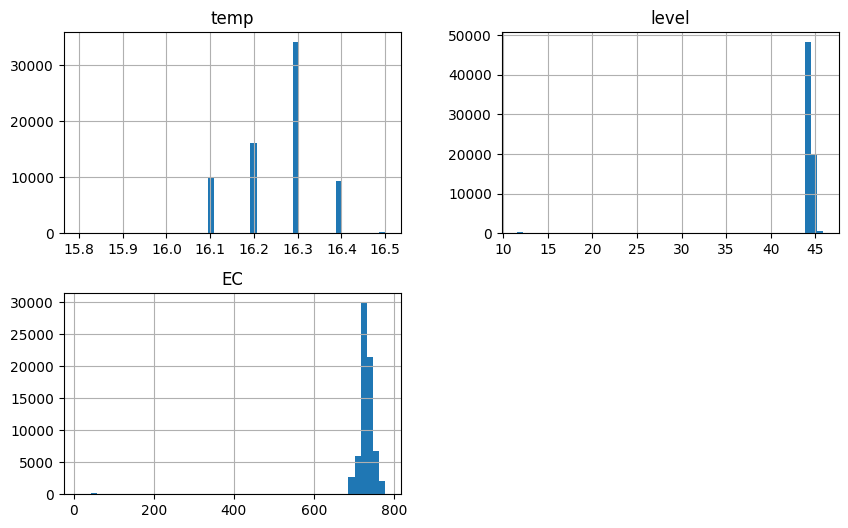

In [15]:
df.hist(bins=50, figsize=(10,6))
plt.show()

[코드 8-22] 상자 그래프로 이상치 확인

<Axes: >

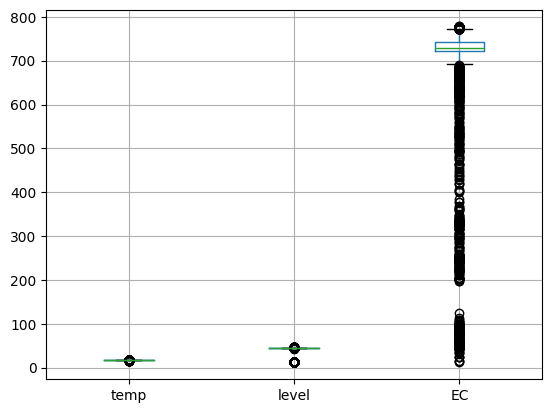

In [16]:
df.boxplot( )